In [5]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix



In [6]:
df = pd.read_csv('/Users/mrbinit/Downloads/chrun.zip')

In [7]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [8]:
df.shape

(7043, 21)

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Contract

In [11]:
df.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [12]:
def contract (x):
    if x == 'Month-to-month':
        return 'month_to_month_contract'
    elif x == 'Two year':
        return 'two_year_contract'
    else:
        return 'one_year_contract'
df['Contract'] = df['Contract'].apply(contract)
# day_copy = day_copy.drop('workingday', axis = 1)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,month_to_month_contract,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,one_year_contract,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,month_to_month_contract,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,one_year_contract,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,month_to_month_contract,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,one_year_contract,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,one_year_contract,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,month_to_month_contract,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,month_to_month_contract,Yes,Mailed check,74.40,306.6,Yes


In [13]:
df.Contract.value_counts()

month_to_month_contract    3875
two_year_contract          1695
one_year_contract          1473
Name: Contract, dtype: int64

In [14]:
contract_dummy = pd.get_dummies(df.Contract, drop_first = True)
contract_dummy  = contract_dummy .astype(int)
contract_dummy 

,one_year_contract,two_year_contract
0,0,0
1,1,0
2,0,0
3,1,0
4,0,0
...,...,...
7038,1,0
7039,1,0
7040,0,0
7041,0,0


In [15]:
# contract_dummy.value_counts()

In [16]:
# contract_dummy.one_year_contract.value_counts()

In [17]:
# contract_dummy.two_year_contract.value_counts()

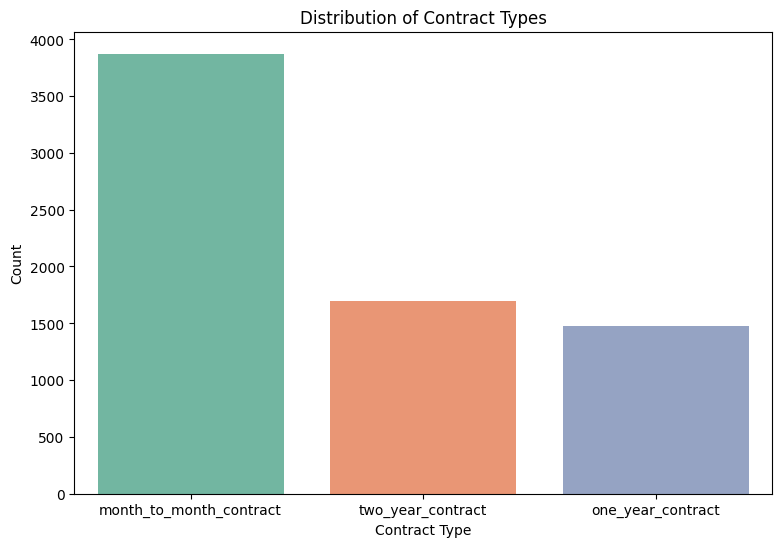

In [18]:
# Assuming df.Contract.value_counts() is provided earlier
contract_counts = df.Contract.value_counts()

# Create the bar plot
plt.figure(figsize=(9, 6))
sns.barplot(y=contract_counts.values, x=contract_counts.index, palette='Set2')
plt.title('Distribution of Contract Types')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

### Gender

In [19]:
df.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

Male Ratio: 0.50
Female Ratio: 0.50


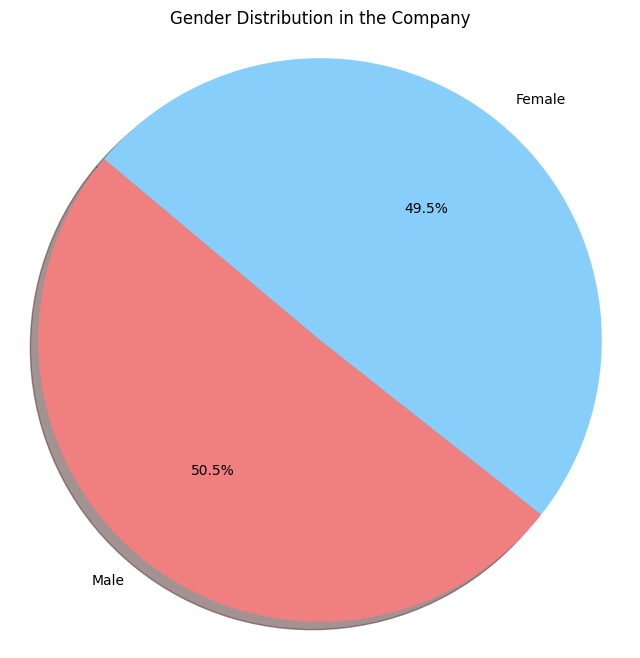

In [20]:
gender_counts = df.gender.value_counts()
male_ratio = gender_counts['Male'] / (gender_counts['Male'] + gender_counts['Female'])
female_ratio = gender_counts['Female'] / (gender_counts['Male'] + gender_counts['Female'])

print(f"Male Ratio: {male_ratio:.2f}")
print(f"Female Ratio: {female_ratio:.2f}")

plt.figure(figsize=(8, 8))
labels = gender_counts.index
sizes = gender_counts.values
colors = ['lightcoral', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  
plt.title('Gender Distribution in the Company')
plt.show()

In [21]:
gender_dummy = pd.get_dummies(df.gender, drop_first = True)
gender_dummy  = gender_dummy.astype(int)
gender_dummy

,Male
0,0
1,1
2,1
3,1
4,0
...,...
7038,1
7039,0
7040,0
7041,1


### senior citizen

In [22]:
df.SeniorCitizen.value_counts()


0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [23]:
def SeniorCitizen(x):
    if x == 0:
        return 'no_senior_citizen'
    else:
        return 'yes_senior_citizen'

df['SeniorCitizen'] = df['SeniorCitizen'].apply(SeniorCitizen)

In [24]:
df['SeniorCitizen'].value_counts()

no_senior_citizen     5901
yes_senior_citizen    1142
Name: SeniorCitizen, dtype: int64

Senior Citizens Ratio: 0.16
Others Ratio: 0.84


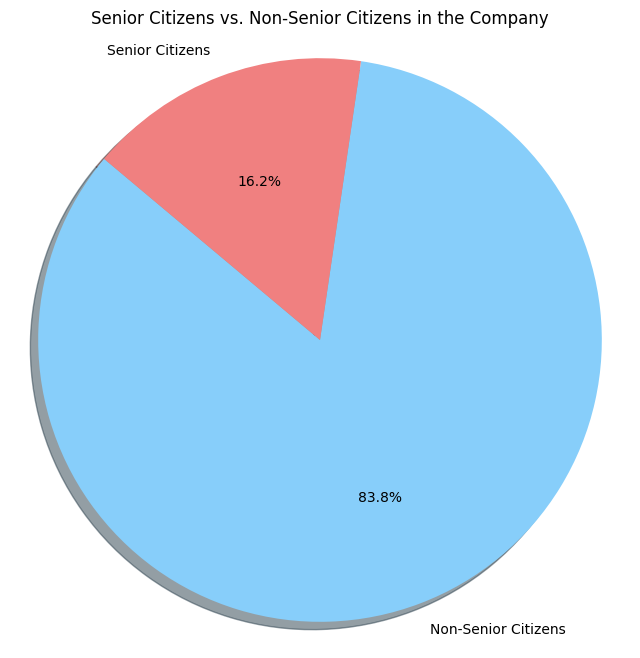

In [25]:
senior_counts = df.SeniorCitizen.value_counts()

senior_ratio = senior_counts[1] / (senior_counts[0] + senior_counts[1])
others_ratio = senior_counts[0] / (senior_counts[0] + senior_counts[1])

print(f"Senior Citizens Ratio: {senior_ratio:.2f}")
print(f"Others Ratio: {others_ratio:.2f}")
plt.figure(figsize=(8, 8))
labels = ['Non-Senior Citizens', 'Senior Citizens']
sizes = senior_counts.values
colors = ['lightskyblue', 'lightcoral']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  
plt.title('Senior Citizens vs. Non-Senior Citizens in the Company')
plt.show()

In [26]:

SeniorCitizen_dummy = pd.get_dummies(df.SeniorCitizen, drop_first = True)
SeniorCitizen_dummy  = SeniorCitizen_dummy.astype(int)
SeniorCitizen_dummy

,yes_senior_citizen
0,0
1,0
2,0
3,0
4,0
...,...
7038,0
7039,0
7040,0
7041,1


### Partner

In [27]:
df.Partner.value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [28]:
def Partner (x):
    if x == 'No':
        return 'no_partner'
    else:
        return 'yes_partner'
df['Partner'] = df['Partner'].apply(Partner)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no_senior_citizen,yes_partner,No,1,No,No phone service,DSL,No,...,No,No,No,No,month_to_month_contract,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no_senior_citizen,no_partner,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,one_year_contract,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,no_senior_citizen,no_partner,No,2,Yes,No,DSL,Yes,...,No,No,No,No,month_to_month_contract,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no_senior_citizen,no_partner,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,one_year_contract,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no_senior_citizen,no_partner,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,month_to_month_contract,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,no_senior_citizen,yes_partner,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,one_year_contract,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,no_senior_citizen,yes_partner,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,one_year_contract,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,no_senior_citizen,yes_partner,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,month_to_month_contract,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,yes_senior_citizen,yes_partner,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,month_to_month_contract,Yes,Mailed check,74.40,306.6,Yes


Employees with Partners Ratio: 0.48
Employees without Partners Ratio: 0.52


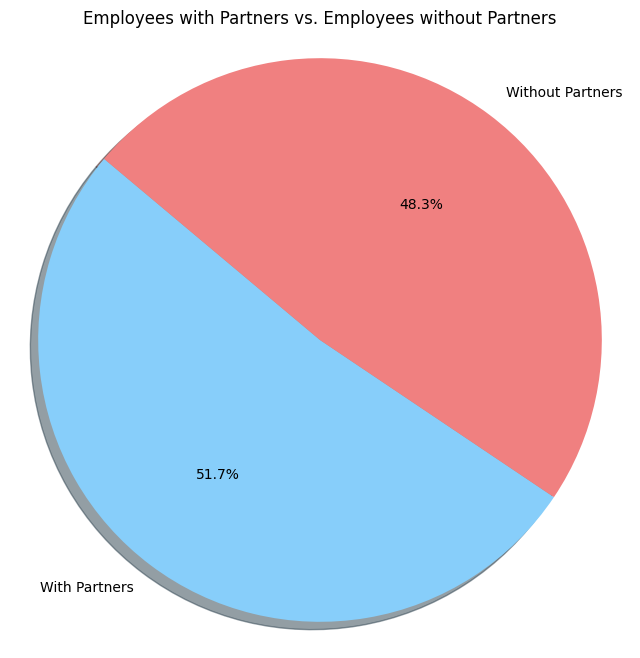

In [29]:
partner_counts = df.Partner.value_counts()
with_partner_ratio = partner_counts['yes_partner'] / (partner_counts['yes_partner'] + partner_counts['no_partner'])
without_partner_ratio = partner_counts['no_partner'] / (partner_counts['yes_partner'] + partner_counts['no_partner'])

print(f"Employees with Partners Ratio: {with_partner_ratio:.2f}")
print(f"Employees without Partners Ratio: {without_partner_ratio:.2f}")
plt.figure(figsize=(8, 8))
labels = ['With Partners', 'Without Partners']
sizes = partner_counts.values
colors = ['lightskyblue', 'lightcoral']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Employees with Partners vs. Employees without Partners')
plt.show()

In [30]:
Partner_dummy = pd.get_dummies(df.Partner, drop_first = True)
Partner_dummy  = Partner_dummy.astype(int)
Partner_dummy

,yes_partner
0,1
1,0
2,0
3,0
4,0
...,...
7038,1
7039,1
7040,1
7041,1


### Dependent

In [31]:
df.Dependents.value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [32]:
def Dependents (x):
    if x == 'No':
        return 'no_dependents'
    else:
        return 'yes_dependents'
df['Dependents'] = df['Dependents'].apply(Dependents)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no_senior_citizen,yes_partner,no_dependents,1,No,No phone service,DSL,No,...,No,No,No,No,month_to_month_contract,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no_senior_citizen,no_partner,no_dependents,34,Yes,No,DSL,Yes,...,Yes,No,No,No,one_year_contract,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,no_senior_citizen,no_partner,no_dependents,2,Yes,No,DSL,Yes,...,No,No,No,No,month_to_month_contract,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no_senior_citizen,no_partner,no_dependents,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,one_year_contract,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no_senior_citizen,no_partner,no_dependents,2,Yes,No,Fiber optic,No,...,No,No,No,No,month_to_month_contract,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,no_senior_citizen,yes_partner,yes_dependents,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,one_year_contract,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,no_senior_citizen,yes_partner,yes_dependents,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,one_year_contract,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,no_senior_citizen,yes_partner,yes_dependents,11,No,No phone service,DSL,Yes,...,No,No,No,No,month_to_month_contract,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,yes_senior_citizen,yes_partner,no_dependents,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,month_to_month_contract,Yes,Mailed check,74.40,306.6,Yes


Customers with Dependents Ratio: 0.30
Customers without Dependents Ratio: 0.70


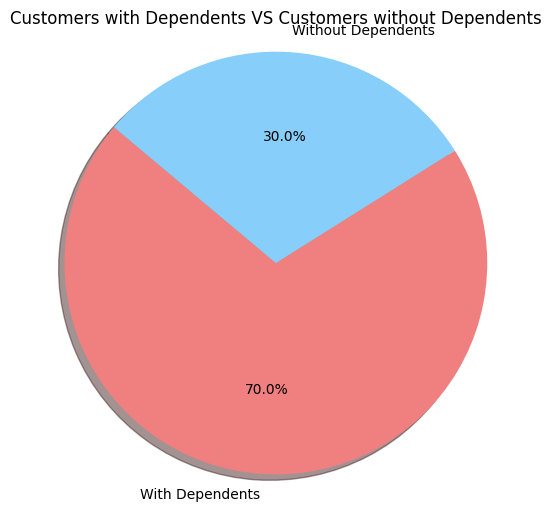

In [33]:
dependents_counts = df.Dependents.value_counts()
with_dependents_ratio = dependents_counts['yes_dependents'] / (dependents_counts['yes_dependents'] + dependents_counts['no_dependents'])
without_dependents_ratio = dependents_counts['no_dependents'] / (dependents_counts['yes_dependents'] + dependents_counts['no_dependents'])
print(f"Customers with Dependents Ratio: {with_dependents_ratio:.2f}")
print(f"Customers without Dependents Ratio: {without_dependents_ratio:.2f}")
plt.figure(figsize=(6, 6))
labels = ['With Dependents', 'Without Dependents']
sizes = dependents_counts.values
colors = ['lightcoral', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal') 
plt.title('Customers with Dependents VS Customers without Dependents')
plt.show()

In [34]:
Dependents_dummy = pd.get_dummies(df.Dependents, drop_first = True)
Dependents_dummy  = Dependents_dummy.astype(int)
Dependents_dummy

,yes_dependents
0,0
1,0
2,0
3,0
4,0
...,...
7038,1
7039,1
7040,1
7041,0


### tenure

In [35]:
df.tenure.value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

### Phone service

In [36]:
df.PhoneService.value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [37]:
def PhoneService(x):
    if x == 'Yes':
        return 'yes_PhoneService'
    else:
        return 'no_PhoneService'

df['PhoneService'] = df['PhoneService'].apply(PhoneService)



In [38]:
df.PhoneService.value_counts()

yes_PhoneService    6361
no_PhoneService      682
Name: PhoneService, dtype: int64

Customers with Phone Service: 0.90
Customers without Phone Service: 0.10


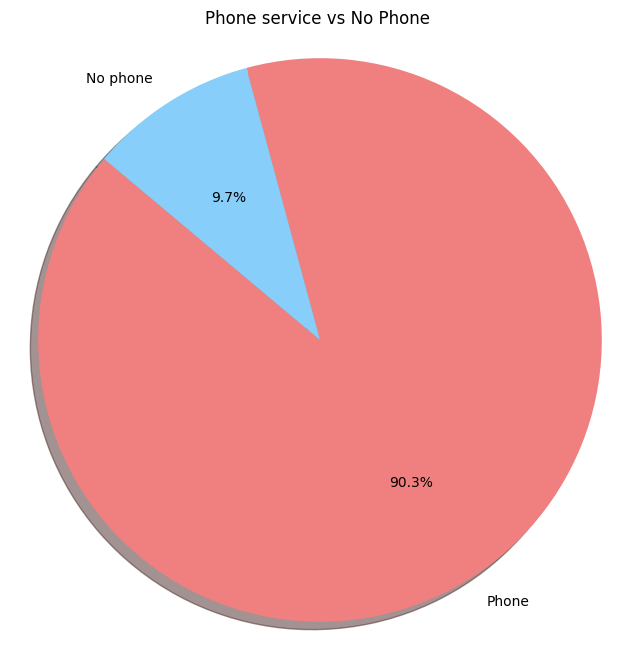

In [39]:
Phone_Service_Counts = df.PhoneService.value_counts()
with_dependents_ratio = Phone_Service_Counts['yes_PhoneService'] / (Phone_Service_Counts['yes_PhoneService'] + Phone_Service_Counts['no_PhoneService'])
without_dependents_ratio = Phone_Service_Counts['no_PhoneService'] / (Phone_Service_Counts['yes_PhoneService'] + Phone_Service_Counts['no_PhoneService'])
print(f"Customers with Phone Service: {with_dependents_ratio:.2f}")
print(f"Customers without Phone Service: {without_dependents_ratio:.2f}")
plt.figure(figsize=(8, 8))
labels = ['Phone', 'No phone']
sizes = Phone_Service_Counts.values
colors = ['lightcoral', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal') 
plt.title('Phone service vs No Phone ')
plt.show()

In [40]:
PhoneService_dummy = pd.get_dummies(df.PhoneService, drop_first = True)
PhoneService_dummy  = PhoneService_dummy.astype(int)
PhoneService_dummy

,yes_PhoneService
0,0
1,1
2,1
3,0
4,1
...,...
7038,1
7039,1
7040,0
7041,1


### Multiple lines


In [41]:
df.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [42]:
def MultipleLines (x):
    if x == 'No':
        return 'no_MultipleLines'
    elif x == 'Yes':
        return 'yes_internet_service'
    else:
        return 'No_phone_service'
df['MultipleLines'] = df['MultipleLines'].apply(MultipleLines)

In [43]:
MultipleLines_dummy = pd.get_dummies(df.MultipleLines, drop_first = True)
MultipleLines_dummy  = MultipleLines_dummy.astype(int)
MultipleLines_dummy

,no_MultipleLines,yes_internet_service
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0
...,...,...
7038,0,1
7039,0,1
7040,0,0
7041,0,1


Customers with Multiple Lines: 0.47
Customers without Multiple Lines: 0.53


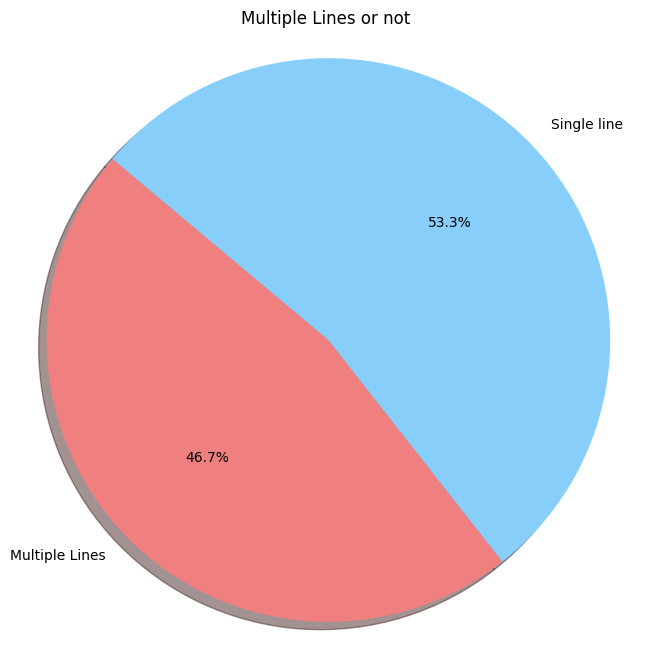

In [44]:
multiple_line_counts = df.MultipleLines.value_counts()

# Calculate ratios
with_dependents_ratio = multiple_line_counts['yes_internet_service'] / (multiple_line_counts['yes_internet_service'] + multiple_line_counts['no_MultipleLines'])
without_dependents_ratio = multiple_line_counts['no_MultipleLines'] / (multiple_line_counts['yes_internet_service'] + multiple_line_counts['no_MultipleLines'])

# Print ratios
print(f"Customers with Multiple Lines: {with_dependents_ratio:.2f}")
print(f"Customers without Multiple Lines: {without_dependents_ratio:.2f}")

# Create the pie chart
plt.figure(figsize=(8, 8))
labels = ['Multiple Lines', 'Single line']  # Update labels
sizes = [with_dependents_ratio, without_dependents_ratio]  # Update sizes
colors = ['lightcoral', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal') 
plt.title('Multiple Lines or not ')
plt.show()

### Internet Service

In [45]:
df.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [46]:
def InternetService (x):
    if x == 'Fiber optic':
        return 'Fiber_optic'
    elif x == 'DSL':
        return 'DSL'
    else:
        return 'No_internet_service'
df['InternetService'] = df['InternetService'].apply(InternetService)

In [47]:
InternetService_dummy = pd.get_dummies(df.InternetService, drop_first = True)
InternetService_dummy  = InternetService_dummy.astype(int)
InternetService_dummy

,Fiber_optic,No_internet_service
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
7038,0,0
7039,1,0
7040,0,0
7041,1,0


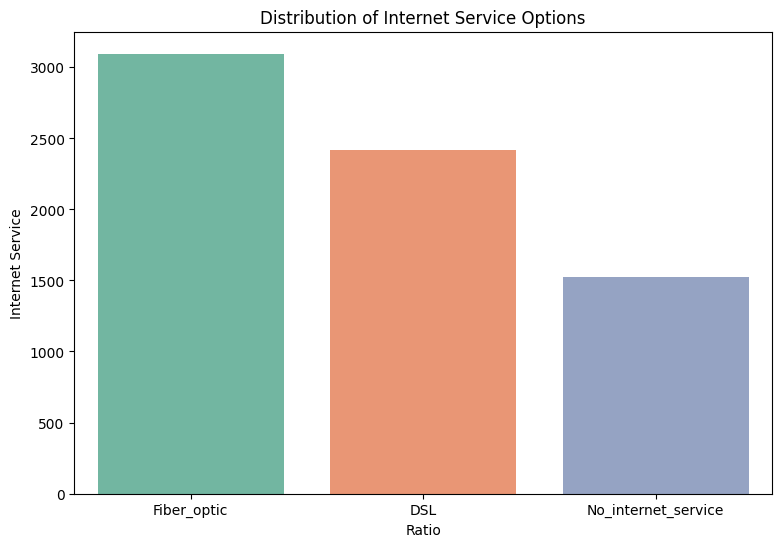

In [48]:
internet_service_counts = df.InternetService.value_counts()
plt.figure(figsize=(9, 6))
sns.barplot(y=internet_service_counts.values, x=internet_service_counts.index, palette= 'Set2')
plt.title('Distribution of Internet Service Options')
plt.xlabel('Ratio')
plt.ylabel('Internet Service')
plt.show()

### Online backup

In [49]:
df.OnlineBackup.value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [50]:
def OnlineBackup (x):
    if x == 'No':
        return 'no_OnlineBackup'
    elif x == 'Yes':
        return 'yes_OnlineBackup'
    else:
        return 'No_internet_service'
df['OnlineBackup'] = df['OnlineBackup'].apply(OnlineBackup)

In [51]:
OnlineBackup_dummy = pd.get_dummies(df.OnlineBackup, drop_first = True)
OnlineBackup_dummy  = OnlineBackup_dummy.astype(int)
OnlineBackup_dummy

,no_OnlineBackup,yes_OnlineBackup
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
7038,1,0
7039,0,1
7040,1,0
7041,1,0


Customers with Online Backup: 0.44
Customers without Online Backup: 0.56


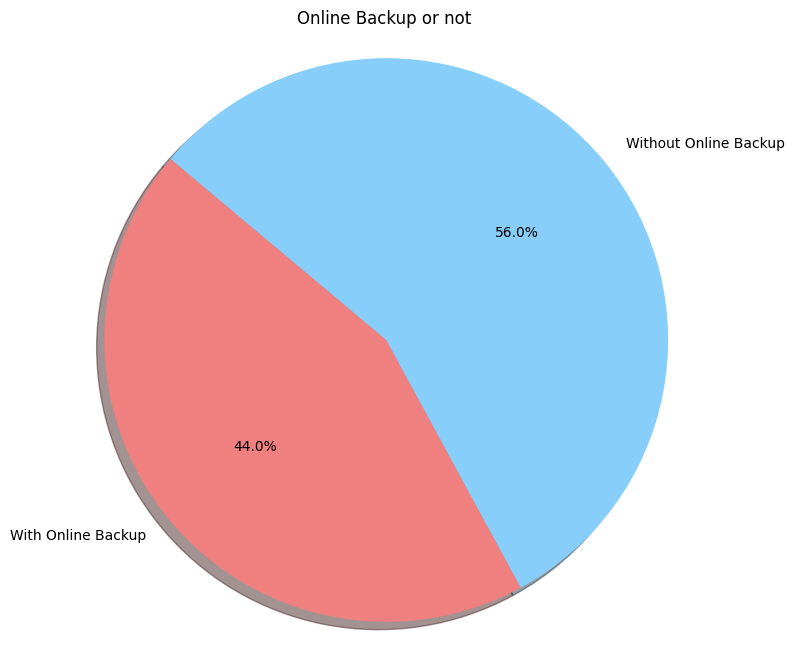

In [52]:
online_backup_counts = df.OnlineBackup.value_counts()
# Calculate ratios
with_online_backup_ratio = online_backup_counts['yes_OnlineBackup'] / (online_backup_counts['yes_OnlineBackup'] + online_backup_counts['no_OnlineBackup'])
without_online_backup_ratio = online_backup_counts['no_OnlineBackup'] / (online_backup_counts['yes_OnlineBackup'] + online_backup_counts['no_OnlineBackup'])

# Print ratios
print(f"Customers with Online Backup: {with_online_backup_ratio:.2f}")
print(f"Customers without Online Backup: {without_online_backup_ratio:.2f}")

# Create the pie chart
plt.figure(figsize=(8, 8))
labels = ['With Online Backup', 'Without Online Backup']  # Update labels
sizes = [with_online_backup_ratio, without_online_backup_ratio]  # Update sizes
colors = ['lightcoral', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal') 
plt.title('Online Backup or not ')
plt.show()

### Device protection

In [53]:
df.DeviceProtection.value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [54]:
def DeviceProtection (x):
    if x == 'No':
        return 'no_DeviceProtection'
    elif x == 'Yes':
        return 'yes_DeviceProtection'
    else:
        return 'No_internet_service'
df['DeviceProtection'] = df['DeviceProtection'].apply(DeviceProtection)

In [55]:
DeviceProtection_dummy = pd.get_dummies(df.DeviceProtection, drop_first = True)
DeviceProtection_dummy  = DeviceProtection_dummy.astype(int)
DeviceProtection_dummy

,no_DeviceProtection,yes_DeviceProtection
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
7038,0,1
7039,0,1
7040,1,0
7041,1,0


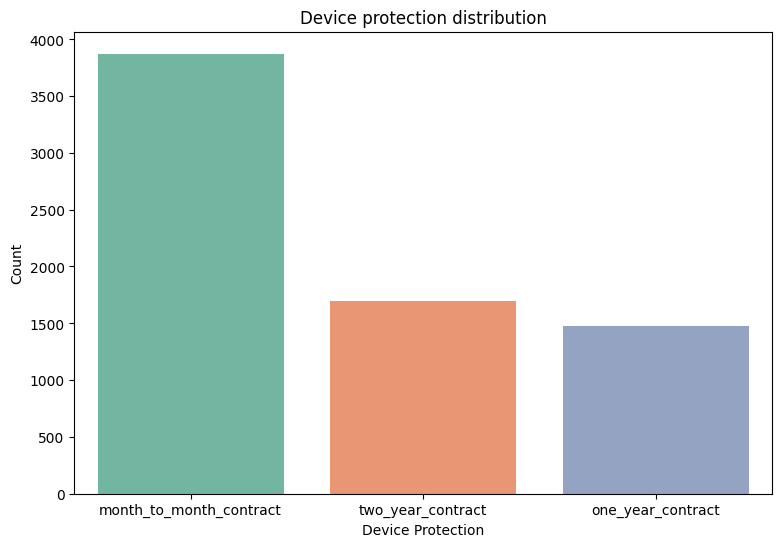

In [56]:
device_protection_counts = df.DeviceProtection.value_counts()

device_protection_counts = df.Contract.value_counts()

# Create the bar plot
plt.figure(figsize=(9, 6))
sns.barplot(y=device_protection_counts.values, x=device_protection_counts.index, palette='Set2')
plt.title('Device protection distribution')
plt.xlabel('Device Protection')
plt.ylabel('Count')
plt.show()

### Tech support

In [57]:
df.TechSupport.value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [58]:
def TechSupport (x):
    if x == 'No':
        return 'no_TechSupport'
    elif x == 'Yes':
        return 'yes_TechSupport'
    else:
        return 'No_internet_service'
df['TechSupport'] = df['TechSupport'].apply(TechSupport)

In [59]:
TechSupport_dummy = pd.get_dummies(df.TechSupport, drop_first = True)
TechSupport_dummy  = TechSupport_dummy.astype(int)
TechSupport_dummy

,no_TechSupport,yes_TechSupport
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
7038,0,1
7039,1,0
7040,1,0
7041,1,0


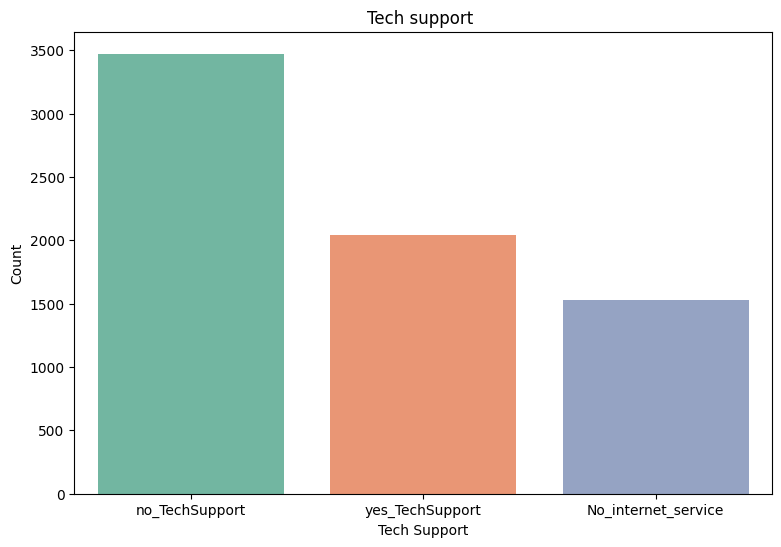

In [60]:
Texh_Support_counts = df.TechSupport.value_counts()


# Create the bar plot
plt.figure(figsize=(9, 6))
sns.barplot(y=Texh_Support_counts.values, x=Texh_Support_counts.index, palette='Set2')
plt.title('Tech support ')
plt.xlabel('Tech Support')
plt.ylabel('Count')
plt.show()

### Streaming Tv 

In [61]:
df.StreamingTV.value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [62]:
def StreamingTV (x):
    if x == 'No':
        return 'no_StreamingTV'
    elif x == 'Yes':
        return 'yes_StreamingTV'
    else:
        return 'No_internet_service'
df['StreamingTV'] = df['StreamingTV'].apply(StreamingTV)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no_senior_citizen,yes_partner,no_dependents,1,no_PhoneService,No_phone_service,DSL,No,...,no_DeviceProtection,no_TechSupport,no_StreamingTV,No,month_to_month_contract,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no_senior_citizen,no_partner,no_dependents,34,yes_PhoneService,no_MultipleLines,DSL,Yes,...,yes_DeviceProtection,no_TechSupport,no_StreamingTV,No,one_year_contract,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,no_senior_citizen,no_partner,no_dependents,2,yes_PhoneService,no_MultipleLines,DSL,Yes,...,no_DeviceProtection,no_TechSupport,no_StreamingTV,No,month_to_month_contract,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no_senior_citizen,no_partner,no_dependents,45,no_PhoneService,No_phone_service,DSL,Yes,...,yes_DeviceProtection,yes_TechSupport,no_StreamingTV,No,one_year_contract,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no_senior_citizen,no_partner,no_dependents,2,yes_PhoneService,no_MultipleLines,Fiber_optic,No,...,no_DeviceProtection,no_TechSupport,no_StreamingTV,No,month_to_month_contract,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,no_senior_citizen,yes_partner,yes_dependents,24,yes_PhoneService,yes_internet_service,DSL,Yes,...,yes_DeviceProtection,yes_TechSupport,yes_StreamingTV,Yes,one_year_contract,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,no_senior_citizen,yes_partner,yes_dependents,72,yes_PhoneService,yes_internet_service,Fiber_optic,No,...,yes_DeviceProtection,no_TechSupport,yes_StreamingTV,Yes,one_year_contract,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,no_senior_citizen,yes_partner,yes_dependents,11,no_PhoneService,No_phone_service,DSL,Yes,...,no_DeviceProtection,no_TechSupport,no_StreamingTV,No,month_to_month_contract,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,yes_senior_citizen,yes_partner,no_dependents,4,yes_PhoneService,yes_internet_service,Fiber_optic,No,...,no_DeviceProtection,no_TechSupport,no_StreamingTV,No,month_to_month_contract,Yes,Mailed check,74.40,306.6,Yes


In [63]:
StreamingTV_dummy = pd.get_dummies(df.StreamingTV, drop_first = True)
StreamingTV_dummy  = StreamingTV_dummy.astype(int)
StreamingTV_dummy

,no_StreamingTV,yes_StreamingTV
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
7038,0,1
7039,0,1
7040,1,0
7041,1,0


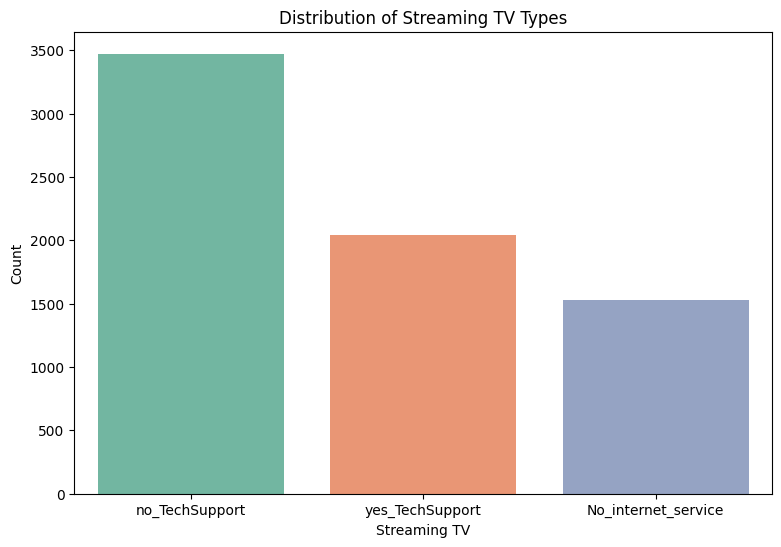

In [64]:
Streaming_Service_counts = df.TechSupport.value_counts()


# Create the bar plot
plt.figure(figsize=(9, 6))
sns.barplot(y=Streaming_Service_counts.values, x=Streaming_Service_counts.index, palette='Set2')
plt.title('Distribution of Streaming TV Types')
plt.xlabel('Streaming TV')
plt.ylabel('Count')
plt.show()

### Streaming movies

In [65]:
df.StreamingMovies.value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [66]:
def StreamingMovies (x):
    if x == 'Yes':
        return 'yes_StreamingMovies'
    elif x == 'No':
        return 'No_StreamingMovies'
    else:
        return 'No_internet_service'
df['StreamingMovies'] = df['StreamingMovies'].apply(StreamingMovies)

In [67]:
StreamingMovies_dummy = pd.get_dummies(df.StreamingMovies, drop_first = True)
StreamingMovies_dummy  = StreamingMovies_dummy.astype(int)
StreamingMovies_dummy

,No_internet_service,yes_StreamingMovies
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
7038,0,1
7039,0,1
7040,0,0
7041,0,0


### Online security

In [68]:
df.OnlineSecurity.value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [69]:
def OnlineSecurity (x):
    if x == 'No':
        return 'no_OnlineSecurity'
    elif x == 'Yes':
        return 'yes_OnlineSecurity'
    else:
        return 'No_internet_service'
df['OnlineSecurity'] = df['OnlineSecurity'].apply(OnlineSecurity)

In [70]:
OnlineSecurity_dummy = pd.get_dummies(df.OnlineSecurity, drop_first = True)
OnlineSecurity_dummy  = OnlineSecurity_dummy.astype(int)
OnlineSecurity_dummy

,no_OnlineSecurity,yes_OnlineSecurity
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
7038,0,1
7039,1,0
7040,0,1
7041,1,0


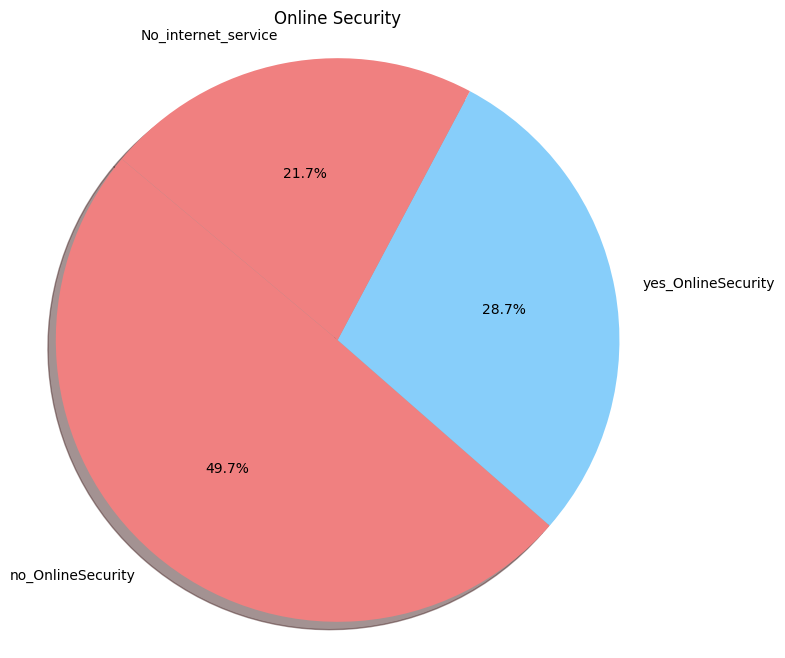

In [71]:
online_security_counts = df.OnlineSecurity.value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
labels = online_security_counts.index
sizes = online_security_counts.values
colors = ['lightcoral', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal') 
plt.title('Online Security')
plt.show()

### Paperless Billing

In [72]:
df.PaperlessBilling.value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [73]:
def PaperlessBilling (x):
    if x == 'No':
        return 'no_paperless_billing'
    else:
        return 'yes_paperless_billing'
df['SeniorCitizen'] = df['SeniorCitizen'].apply(SeniorCitizen)

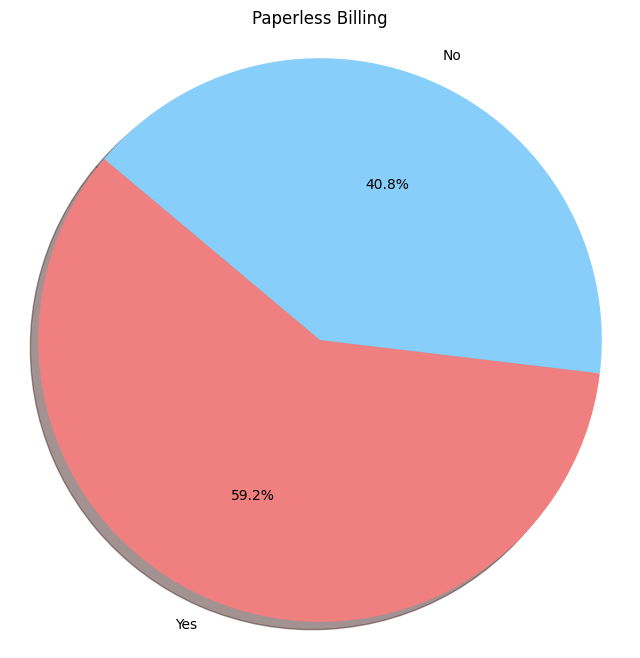

In [74]:
paperless_billing_counts = df.PaperlessBilling.value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
labels = paperless_billing_counts.index
sizes = paperless_billing_counts.values
colors = ['lightcoral', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal') 
plt.title('Paperless Billing')
plt.show()

In [75]:
PaperlessBilling_dummy = pd.get_dummies(df.PaperlessBilling, drop_first = True)
PaperlessBilling_dummy  = PaperlessBilling_dummy.astype(int)
PaperlessBilling_dummy

,Yes
0,1
1,0
2,1
3,0
4,1
...,...
7038,1
7039,1
7040,1
7041,1


### payment method 

In [76]:
df.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [77]:
def PaymentMethod(x):
    if x == 'Electronic check':
        return 'Electronic_check_PaymentMethod'
    elif x == 'Mailed check':
        return 'Mailed_check_PaymentMethod'
    elif x == 'Bank transfer (automatic)':
        return 'automatic_Bank_transfer_PaymentMethod'
    else:
        return 'automatic_Credit_card_PaymentMethod'

df['PaymentMethod'] = df['PaymentMethod'].apply(PaymentMethod)

In [78]:
df.PaymentMethod.value_counts()

Electronic_check_PaymentMethod           2365
Mailed_check_PaymentMethod               1612
automatic_Bank_transfer_PaymentMethod    1544
automatic_Credit_card_PaymentMethod      1522
Name: PaymentMethod, dtype: int64

In [79]:
PaymentMethod_dummy = pd.get_dummies(df.PaymentMethod, drop_first = True)
PaymentMethod_dummy  = PaymentMethod_dummy.astype(int)
PaymentMethod_dummy

,Mailed_check_PaymentMethod,automatic_Bank_transfer_PaymentMethod,automatic_Credit_card_PaymentMethod
0,0,0,0
1,1,0,0
2,1,0,0
3,0,1,0
4,0,0,0
...,...,...,...
7038,1,0,0
7039,0,0,1
7040,0,0,0
7041,1,0,0


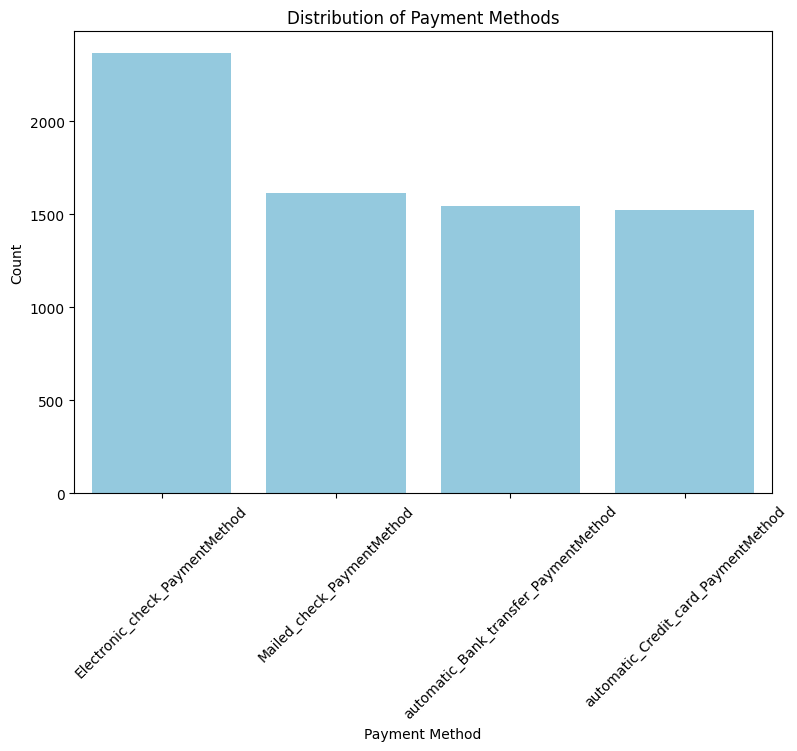

In [80]:
# Assuming df.PaymentMethod.value_counts() is provided earlier
payment_method_counts = df.PaymentMethod.value_counts()

# Create the bar plot
plt.figure(figsize=(9, 6))
sns.barplot(y=payment_method_counts.values, x=payment_method_counts.index, color='skyblue')
plt.title('Distribution of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

In [81]:
df.MonthlyCharges.value_counts()   #### no need to do

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64

### Total charges

In [82]:
df.TotalCharges.value_counts()  ####

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [83]:
df.TotalCharges.isnull().sum()

0

### Chrun

In [84]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

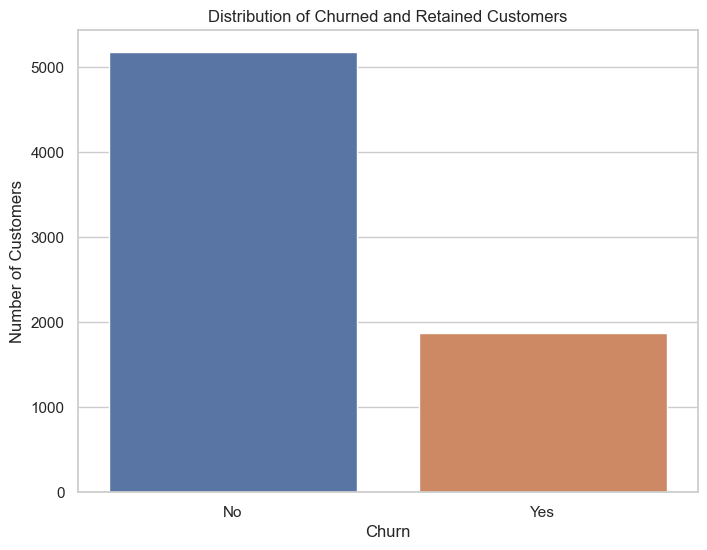

In [85]:
churn_counts = df.Churn.value_counts()
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.barplot(x=churn_counts.index, y=churn_counts.values)
plt.title('Distribution of Churned and Retained Customers')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()

In [86]:
def Churn(x):
    if x == 'No':
        return 0
    else:
        return 1
df['Churn'] = df['Churn'].apply(Churn)

In [87]:
df.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [88]:
# churn_counts = df.Churn.value_counts()
# plt.figure(figsize=(8, 6))
# sns.set(style="whitegrid")
# sns.barplot(x=churn_counts.index, y=churn_counts.values)
# plt.title('Distribution of Churned and Retained Customers')
# plt.xlabel('Churn')
# plt.ylabel('Number of Customers')
# plt.show()

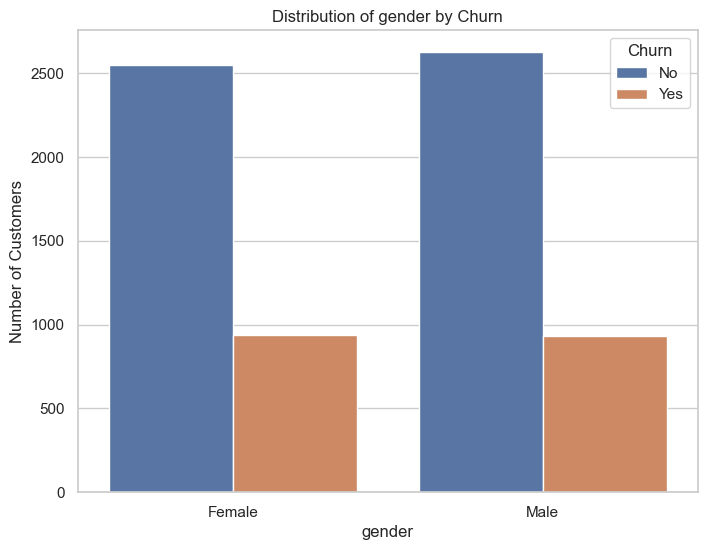

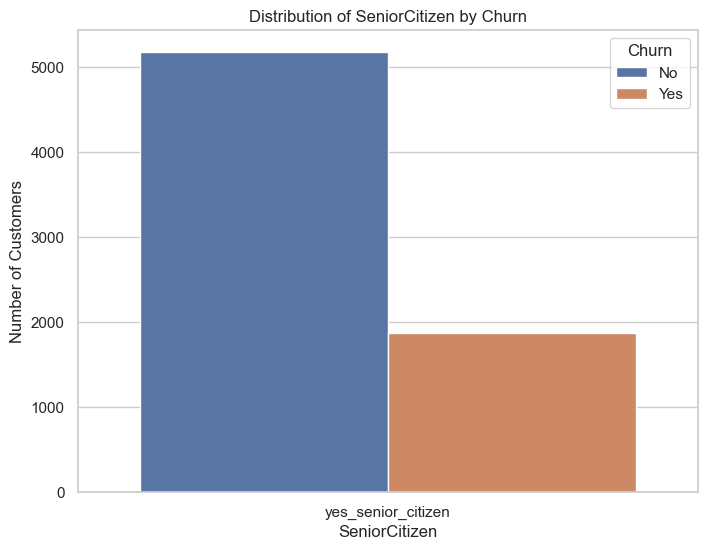

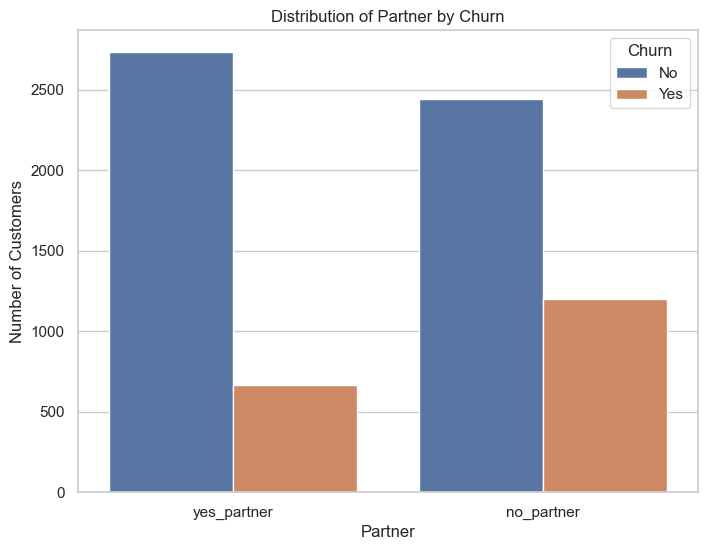

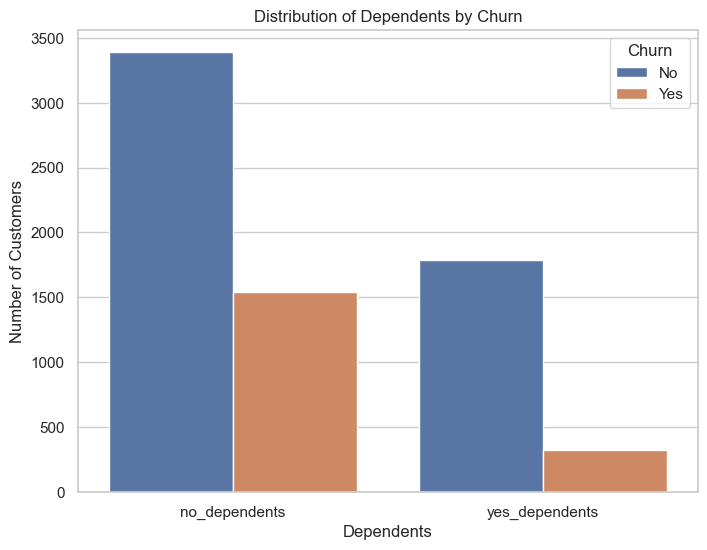

In [89]:
demographic_attributes = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

for attribute in demographic_attributes:
    plt.figure(figsize=(8, 6))
    sns.set(style="whitegrid")
    sns.countplot(data=df, x=attribute, hue='Churn')
    plt.title(f'Distribution of {attribute} by Churn')
    plt.xlabel(attribute)
    plt.ylabel('Number of Customers')
    plt.legend(title='Churn', labels=['No', 'Yes'])
    plt.show()

In [90]:
df.value_counts()

customerID  gender  SeniorCitizen       Partner      Dependents      tenure  PhoneService      MultipleLines         InternetService      OnlineSecurity       OnlineBackup         DeviceProtection      TechSupport          StreamingTV          StreamingMovies      Contract                 PaperlessBilling  PaymentMethod                          MonthlyCharges  TotalCharges  Churn
0002-ORFBO  Female  yes_senior_citizen  yes_partner  yes_dependents  9       yes_PhoneService  no_MultipleLines      DSL                  no_OnlineSecurity    yes_OnlineBackup     no_DeviceProtection   yes_TechSupport      yes_StreamingTV      No_StreamingMovies   one_year_contract        Yes               Mailed_check_PaymentMethod             65.60           593.3         0        1
6616-AALSR  Female  yes_senior_citizen  yes_partner  yes_dependents  65      yes_PhoneService  yes_internet_service  Fiber_optic          yes_OnlineSecurity   no_OnlineBackup      yes_DeviceProtection  no_TechSupport       yes_St

In [91]:
import pandas as pd

# Assuming df is your DataFrame
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [92]:
final = pd.concat([
    df,
    Partner_dummy,
    PaymentMethod_dummy,
    PaperlessBilling_dummy,
    OnlineSecurity_dummy,
    StreamingMovies_dummy,
    StreamingTV_dummy,
    TechSupport_dummy,
    DeviceProtection_dummy,
    OnlineBackup_dummy,
    InternetService_dummy,
    MultipleLines_dummy,
    PhoneService_dummy,
    Dependents_dummy,
    SeniorCitizen_dummy,
    contract_dummy,
    gender_dummy
], axis=1)


In [93]:
final = final.drop(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges'], axis = 1)

In [94]:
final.head(10)

,customerID,tenure,TotalCharges,Churn,yes_partner,Mailed_check_PaymentMethod,automatic_Bank_transfer_PaymentMethod,automatic_Credit_card_PaymentMethod,Yes,no_OnlineSecurity,...,Fiber_optic,No_internet_service,no_MultipleLines,yes_internet_service,yes_PhoneService,yes_dependents,yes_senior_citizen,one_year_contract,two_year_contract,Male
0,7590-VHVEG,1,29.85,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,5575-GNVDE,34,1889.50,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,1
2,3668-QPYBK,2,108.15,1,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1
3,7795-CFOCW,45,1840.75,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,9237-HQITU,2,151.65,1,0,0,0,0,1,1,...,1,0,1,0,1,0,0,0,0,0
5,9305-CDSKC,8,820.50,1,0,0,0,0,1,1,...,1,0,0,1,1,0,0,0,0,0
6,1452-KIOVK,22,1949.40,0,0,0,0,1,1,1,...,1,0,0,1,1,1,0,0,0,1
7,6713-OKOMC,10,301.90,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,7892-POOKP,28,3046.05,1,1,0,0,0,1,1,...,1,0,0,1,1,0,0,0,0,0
9,6388-TABGU,62,3487.95,0,0,0,1,0,0,0,...,0,0,1,0,1,1,0,1,0,1


In [95]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   TotalCharges                           7032 non-null   float64
 3   Churn                                  7043 non-null   int64  
 4   yes_partner                            7043 non-null   int64  
 5   Mailed_check_PaymentMethod             7043 non-null   int64  
 6   automatic_Bank_transfer_PaymentMethod  7043 non-null   int64  
 7   automatic_Credit_card_PaymentMethod    7043 non-null   int64  
 8   Yes                                    7043 non-null   int64  
 9   no_OnlineSecurity                      7043 non-null   int64  
 10  yes_OnlineSecurity                     7043 non-null   int64  
 11  No_i

### Dividing into train and test data

In [96]:
final_train, final_test = train_test_split(final, train_size = 0.7, random_state = 100)

print(final_train.shape)
print(final_test.shape)

(4930, 31)
(2113, 31)


## Performing scaling on continuous variables 

In [97]:

scaler = MinMaxScaler()

In [98]:
# creating a list of numeric variables 

numeric = ['tenure']

In [99]:
final_train[numeric] = scaler.fit_transform(final_train[numeric])

In [100]:
final_train.head()

,customerID,tenure,TotalCharges,Churn,yes_partner,Mailed_check_PaymentMethod,automatic_Bank_transfer_PaymentMethod,automatic_Credit_card_PaymentMethod,Yes,no_OnlineSecurity,...,Fiber_optic,No_internet_service,no_MultipleLines,yes_internet_service,yes_PhoneService,yes_dependents,yes_senior_citizen,one_year_contract,two_year_contract,Male
877,7876-AEHIG,0.708333,3077.00,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
5792,3500-RMZLT,0.208333,1426.75,1,0,1,0,0,1,0,...,1,0,1,0,1,0,1,0,0,0
5334,6386-SZZKH,0.680556,5293.20,1,1,0,1,0,1,1,...,1,0,0,1,1,1,0,0,1,0
878,7945-HLKEA,0.833333,4039.50,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0
6578,3898-BSJYF,0.138889,693.30,0,0,0,0,1,0,0,...,0,0,0,1,1,1,0,1,0,0


In [101]:
x = final.drop(['Churn', 'customerID'], axis = 1)

In [102]:
y = final['Churn']

In [103]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [105]:
import numpy as np

print(np.isinf(x_train).sum())


tenure                                   0
TotalCharges                             0
yes_partner                              0
Mailed_check_PaymentMethod               0
automatic_Bank_transfer_PaymentMethod    0
automatic_Credit_card_PaymentMethod      0
Yes                                      0
no_OnlineSecurity                        0
yes_OnlineSecurity                       0
No_internet_service                      0
yes_StreamingMovies                      0
no_StreamingTV                           0
yes_StreamingTV                          0
no_TechSupport                           0
yes_TechSupport                          0
no_DeviceProtection                      0
yes_DeviceProtection                     0
no_OnlineBackup                          0
yes_OnlineBackup                         0
Fiber_optic                              0
No_internet_service                      0
no_MultipleLines                         0
yes_internet_service                     0
yes_PhoneSe

In [106]:
print(x_train.isna().sum())


tenure                                    0
TotalCharges                             10
yes_partner                               0
Mailed_check_PaymentMethod                0
automatic_Bank_transfer_PaymentMethod     0
automatic_Credit_card_PaymentMethod       0
Yes                                       0
no_OnlineSecurity                         0
yes_OnlineSecurity                        0
No_internet_service                       0
yes_StreamingMovies                       0
no_StreamingTV                            0
yes_StreamingTV                           0
no_TechSupport                            0
yes_TechSupport                           0
no_DeviceProtection                       0
yes_DeviceProtection                      0
no_OnlineBackup                           0
yes_OnlineBackup                          0
Fiber_optic                               0
No_internet_service                       0
no_MultipleLines                          0
yes_internet_service            

In [107]:
median_total_charges = x_train['TotalCharges'].median()
x_train['TotalCharges'].fillna(median_total_charges, inplace=True)


### Building the first model


In [108]:
import statsmodels.api as sm
model = sm.GLM(y_train, sm.add_constant(x_train), family=sm.families.Binomial())
result = model.fit()
print(result.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2009.2
Date:                Tue, 15 Aug 2023   Deviance:                       4018.5
Time:                        09:52:36   Pearson chi2:                 5.76e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2882
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

### Selecting the Variables with RFE

In [109]:

from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression()

In [110]:
from sklearn.feature_selection import RFE 
rfe = RFE(estimator=logreg, n_features_to_select = 10)

rfe = rfe.fit(x_train, y_train)

/Users/mrbinit/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mrbinit/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

In [111]:
# creating a list of all the variables and their RFE rankings 

list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('tenure', False, 16),
 ('TotalCharges', False, 20),
 ('yes_partner', False, 17),
 ('Mailed_check_PaymentMethod', False, 3),
 ('automatic_Bank_transfer_PaymentMethod', True, 1),
 ('automatic_Credit_card_PaymentMethod', True, 1),
 ('Yes', True, 1),
 ('no_OnlineSecurity', True, 1),
 ('yes_OnlineSecurity', False, 9),
 ('No_internet_service', False, 8),
 ('yes_StreamingMovies', False, 11),
 ('no_StreamingTV', False, 15),
 ('yes_StreamingTV', False, 7),
 ('no_TechSupport', False, 4),
 ('yes_TechSupport', True, 1),
 ('no_DeviceProtection', False, 18),
 ('yes_DeviceProtection', False, 19),
 ('no_OnlineBackup', True, 1),
 ('yes_OnlineBackup', False, 6),
 ('Fiber_optic', True, 1),
 ('No_internet_service', False, 10),
 ('no_MultipleLines', False, 12),
 ('yes_internet_service', False, 13),
 ('yes_PhoneService', True, 1),
 ('yes_dependents', False, 2),
 ('yes_senior_citizen', False, 5),
 ('one_year_contract', True, 1),
 ('two_year_contract', True, 1),
 ('Male', False, 14)]

In [112]:
# storing the selected columns in col

col = x_train.columns[rfe.support_]

In [113]:
x_train[col].head()

,automatic_Bank_transfer_PaymentMethod,automatic_Credit_card_PaymentMethod,Yes,no_OnlineSecurity,yes_TechSupport,no_OnlineBackup,Fiber_optic,yes_PhoneService,one_year_contract,two_year_contract
877,1,0,0,0,1,1,0,0,1,0
5792,0,0,1,0,1,1,1,1,0,0
5334,1,0,1,1,1,0,1,1,0,1
878,0,0,0,0,1,1,0,1,1,0
6578,0,1,0,0,1,1,0,1,1,0


In [114]:
# chekcking the selected columns 

x_train.columns[rfe.support_]

Index(['automatic_Bank_transfer_PaymentMethod',
       'automatic_Credit_card_PaymentMethod', 'Yes', 'no_OnlineSecurity',
       'yes_TechSupport', 'no_OnlineBackup', 'Fiber_optic', 'yes_PhoneService',
       'one_year_contract', 'two_year_contract'],
      dtype='object')

### Building the Model Based on the selected variables 

In [115]:
# creating the model 

x_train_sm = sm.add_constant(x_train[col])
model_one = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
model_one.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4919
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2106.7
Date:                Tue, 15 Aug 2023   Deviance:                       4213.4
Time:                        09:52:37   Pearson chi2:                 5.06e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2595
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.2033      0.156     -7.728      0.000      -1.508      -0.898
automatic_Bank_transfer_PaymentMethod    -0.3786      0.106     -3.573      0.000      -0.586      -0.171
automatic_Credit_card_PaymentMethod      -0.4999      0.110     -4.563      0.000      -0.715      -0.285
Yes                                       0.4012      0.086      4.651      0.000       0.232       0.570
no_OnlineSecurity                         0.5225      0.092      5.669      0.000       0.342       0.703
yes_TechSupport                          -0.5306      0.097     -5.448      0.000      -0.722      -0.340
no_OnlineBackup                           0.5145      0.081      6.338      0.000       0.355       0.674
Fiber_optic                               0.9787      0.094     10.462      0.000       0.795       1.162
yes_PhoneService                         -0.4253      0.140     -3.040      0.002      -0.699      -0.151
one_year_contract                        -1.2394      0.115    -10.783      0.000      -1.465      -1.014
two_year_contract                        -2.2223      0.187    -11.913      0.000      -2.588      -1.857
=========================================================================================================
"""

In [116]:
# importing relevant libraries 

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [117]:
# creating a new dataframe that consists of the name of the variables and their respective VIF

vif = pd.DataFrame()

# assigning the column 'variables' with the columns of X_train 

vif['variables'] = x_train[col].columns

# assigning the column 'VIF' with the VIF values of the variales 

vif['VIF'] = [variance_inflation_factor(x_train[col].values,i) for i in range (x_train[col].shape[1])]

# rounding off the VIF values to 2 decimal places 

vif['VIF'] = round(vif['VIF'],2)

# sorting the VIF values in descending order 

vif = vif.sort_values(by = 'VIF' , ascending = False)

# printing the dataframe vif 

vif

,variables,VIF
7,yes_PhoneService,4.47
3,no_OnlineSecurity,2.73
2,Yes,2.66
6,Fiber_optic,2.55
5,no_OnlineBackup,2.05
9,two_year_contract,1.99
4,yes_TechSupport,1.60
8,one_year_contract,1.53
0,automatic_Bank_transfer_PaymentMethod,1.49
1,automatic_Credit_card_PaymentMethod,1.48


In [118]:
new = x_train[col]

In [119]:
new.drop('Yes', axis = 1, inplace = True)

/var/folders/_7/q65t_5bs3653ct73dh3s10w00000gn/T/ipykernel_6426/1421075979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new.drop('Yes', axis = 1, inplace = True)


In [120]:


x_train_sm = sm.add_constant(new)
model_one = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
pred = model_one.fit()
pred.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4920
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2117.6
Date:                Tue, 15 Aug 2023   Deviance:                       4235.2
Time:                        09:52:37   Pearson chi2:                 4.99e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2562
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.9790      0.147     -6.662      0.000      -1.267      -0.691
automatic_Bank_transfer_PaymentMethod    -0.3800      0.106     -3.590      0.000      -0.587      -0.173
automatic_Credit_card_PaymentMethod      -0.4923      0.109     -4.503      0.000      -0.707      -0.278
no_OnlineSecurity                         0.5664      0.092      6.177      0.000       0.387       0.746
yes_TechSupport                          -0.5199      0.097     -5.345      0.000      -0.711      -0.329
no_OnlineBackup                           0.5120      0.081      6.318      0.000       0.353       0.671
Fiber_optic                               1.0738      0.092     11.721      0.000       0.894       1.253
yes_PhoneService                         -0.4623      0.139     -3.320      0.001      -0.735      -0.189
one_year_contract                        -1.2544      0.115    -10.938      0.000      -1.479      -1.030
two_year_contract                        -2.2492      0.186    -12.078      0.000      -2.614      -1.884
=========================================================================================================
"""

In [121]:
# creating a new dataframe that consists of the name of the variables and their respective VIF

vif = pd.DataFrame()

# assigning the column 'variables' with the columns of X_train 

vif['variables'] = new.columns

# assigning the column 'VIF' with the VIF values of the variales 

vif['VIF'] = [variance_inflation_factor(new.values,i) for i in range (new.shape[1])]

# rounding off the VIF values to 2 decimal places 

vif['VIF'] = round(vif['VIF'],2)

# sorting the VIF values in descending order 

vif = vif.sort_values(by = 'VIF' , ascending = False)

# printing the dataframe vif 

vif

,variables,VIF
6,yes_PhoneService,4.14
2,no_OnlineSecurity,2.61
5,Fiber_optic,2.46
4,no_OnlineBackup,2.03
8,two_year_contract,1.99
3,yes_TechSupport,1.59
7,one_year_contract,1.53
0,automatic_Bank_transfer_PaymentMethod,1.49
1,automatic_Credit_card_PaymentMethod,1.48


In [122]:
# Getting the predicted values on the train set

y_train_pred = pred.predict(x_train_sm)
y_train_pred[:10]

877     0.067781
5792    0.407233
5334    0.049723
878     0.062759
6578    0.039319
3090    0.410242
3043    0.524820
5028    0.041619
4463    0.670582
2822    0.079182
dtype: float64

In [123]:
y_train_pred

877     0.067781
5792    0.407233
5334    0.049723
878     0.062759
6578    0.039319
          ...   
79      0.039616
3927    0.126347
5955    0.010047
6936    0.549538
5640    0.670582
Length: 4930, dtype: float64

In [124]:
y_train_pred = y_train_pred.values.reshape(-1)

In [125]:

y_train_pred[:10]

array([0.06778126, 0.40723274, 0.04972332, 0.06275912, 0.03931877,
       0.41024235, 0.52481969, 0.04161935, 0.67058187, 0.07918177])

In [126]:
# creating the columns 'Convert' and 'Convert_prob' for the dataframe y_train_final

y_train_final = pd.DataFrame({'Churn' :y_train.values, 'Churn_prob' : y_train_pred })

In [127]:
# creating a column 'Lead_Number' for the datframe y_train_final

y_train_final['customerID'] = final['customerID']

In [128]:
y_train_final.head()

,Churn,Churn_prob,customerID
0,0,0.067781,7590-VHVEG
1,1,0.407233,5575-GNVDE
2,1,0.049723,3668-QPYBK
3,0,0.062759,7795-CFOCW
4,0,0.039319,9237-HQITU


In [129]:
# creating a column predicted with the cutoff at 0.5

y_train_final['predicted'] = y_train_final.Churn_prob.map(lambda x: 1 if x >0.5 else 0)

In [130]:
y_train_final.head()

,Churn,Churn_prob,customerID,predicted
0,0,0.067781,7590-VHVEG,0
1,1,0.407233,5575-GNVDE,0
2,1,0.049723,3668-QPYBK,0
3,0,0.062759,7795-CFOCW,0
4,0,0.039319,9237-HQITU,0


In [131]:
y_train_final.predicted.value_counts()

0    3738
1    1192
Name: predicted, dtype: int64

In [132]:
# calculating the score and storing the information in the column 'score'

y_train_final['score'] = round(y_train_final['Churn_prob']*100,0)

In [133]:
y_train_final.head()

,Churn,Churn_prob,customerID,predicted,score
0,0,0.067781,7590-VHVEG,0,7.0
1,1,0.407233,5575-GNVDE,0,41.0
2,1,0.049723,3668-QPYBK,0,5.0
3,0,0.062759,7795-CFOCW,0,6.0
4,0,0.039319,9237-HQITU,0,4.0


### Evaluation the model

In [134]:
# importing relevant libraries 

from sklearn import metrics 

In [135]:
# creating the confusion matrix 

confusion = metrics.confusion_matrix(y_train_final.Churn, y_train_final.predicted)
print(confusion)

[[3170  457]
 [ 568  735]]


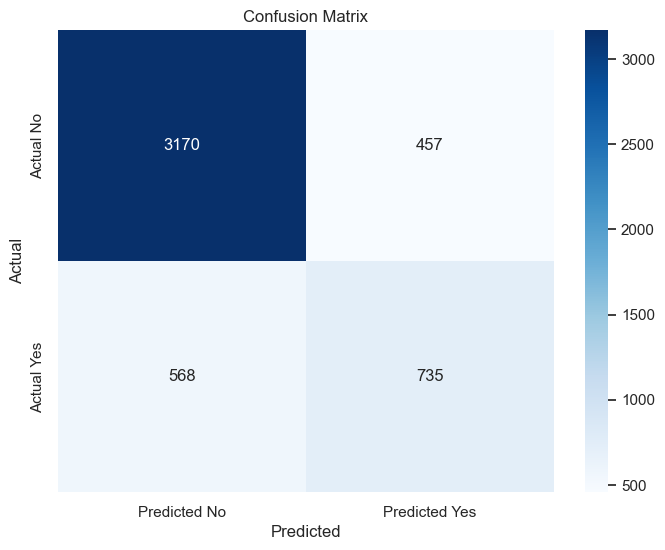

In [136]:

import seaborn as sns

confusion = metrics.confusion_matrix(y_train_final.Churn, y_train_final.predicted)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted No", "Predicted Yes"],
            yticklabels=["Actual No", "Actual Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [137]:
print(metrics.accuracy_score(y_train_final.Churn, y_train_final.predicted))

0.7920892494929006


### Checking the further metrices

In [138]:
# true positives
tp = confusion[1,1] 

#true negatives
tn = confusion[0,0]

# false positives
fp = confusion[0,1]

# false negatives
fn = confusion[1,0]

In [139]:
# sensitivity of the model : A measure of how accurately does the model predict the positive outcomes
# sensitivity can also be termed as true positive rate 

tp /(tp+fn)

0.5640828856485035

The model has low sensitivity. For our requirement this metric needs to be high. 

In [140]:
# specificity of the model : A measure of how accurately does the model predict negative outcomes 

tn /(tn+fp)

0.8740005514199063

The model has high specificity 

In [141]:
# false positive rate : A measure of how many 0s were predicted as 1 

fp /(tn+fp)

0.12599944858009374

#### Checking the ROC curve 

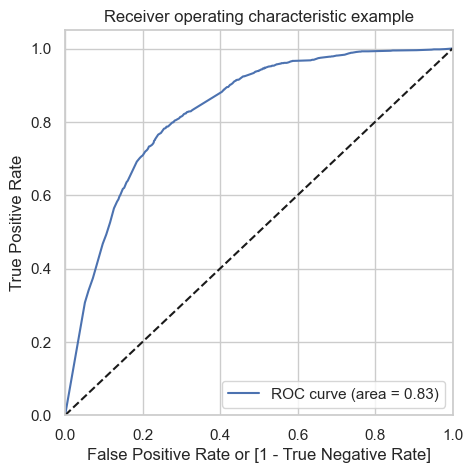

In [142]:
# preparing the ROC curve 

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_final.Churn, y_train_final.Churn_prob)

- The area under the ROC curve is 0.83 which depicts that the model is a good classifier

In [143]:
# checking different probablity cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_final[i] = y_train_final.Churn_prob.map(lambda x:1 if x>i else 0)
y_train_final.head()

,Churn,Churn_prob,customerID,predicted,score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.067781,7590-VHVEG,0,7.0,1,0,0,0,0,0,0,0,0,0
1,1,0.407233,5575-GNVDE,0,41.0,1,1,1,1,1,0,0,0,0,0
2,1,0.049723,3668-QPYBK,0,5.0,1,0,0,0,0,0,0,0,0,0
3,0,0.062759,7795-CFOCW,0,6.0,1,0,0,0,0,0,0,0,0,0
4,0,0.039319,9237-HQITU,0,4.0,1,0,0,0,0,0,0,0,0,0


In [163]:
# creating a dataframe with information about probability, accuracy, sensitivity and specificity 

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
#from sklearn.metrics import confusion_matrix

# tp = confusion[1,1]  true positive 
# tn = confusion[0,0]  true negatives
# fp = confusion[0,1]  false positives
# fn = confusion[1,0]  false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_final.Churn, y_train_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.264300  1.000000  0.000000
0.1   0.1  0.596552  0.951650  0.468983
0.2   0.2  0.720284  0.828089  0.681555
0.3   0.3  0.763692  0.752878  0.767577
0.4   0.4  0.775659  0.708365  0.799835
0.5   0.5  0.792089  0.564083  0.874001
0.6   0.6  0.779310  0.306984  0.948994
0.7   0.7  0.735700  0.000000  1.000000
0.8   0.8  0.735700  0.000000  1.000000
0.9   0.9  0.735700  0.000000  1.000000


- If we have to be extremely sure : we can choose 0.3 because sensitivity is 75 percentage and accuracy 76 percentage
- If we have to save time then : we can choose 0.4 because accuracy : 0.77 sensi: 0.70

# plotting probability 



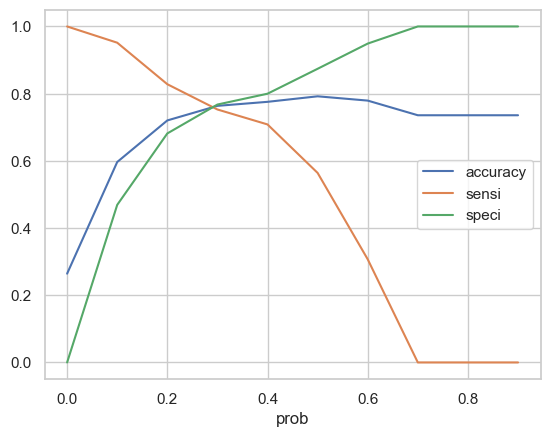

In [145]:

cutoff_df.plot.line(x= 'prob', y = ['accuracy','sensi','speci'])
plt.show()


- According to the graph the optimal value of cutoff seems to be around 0.3 

In [146]:
# tarnsforming the continuous features in the test dataset 

final_test[numeric] = scaler.fit_transform(final_test[numeric])

In [147]:
final_test.head()

,customerID,tenure,TotalCharges,Churn,yes_partner,Mailed_check_PaymentMethod,automatic_Bank_transfer_PaymentMethod,automatic_Credit_card_PaymentMethod,Yes,no_OnlineSecurity,...,Fiber_optic,No_internet_service,no_MultipleLines,yes_internet_service,yes_PhoneService,yes_dependents,yes_senior_citizen,one_year_contract,two_year_contract,Male
4880,1215-EXRMO,0.694444,1067.65,0,1,1,0,0,0,0,...,0,1,1,0,1,0,0,0,1,1
1541,2429-AYKKO,1.000000,1434.10,0,0,0,1,0,0,0,...,0,1,1,0,1,0,0,0,1,1
1289,9968-FFVVH,0.875000,4111.35,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,1,0,1
5745,3580-GICBM,0.847222,1445.20,0,1,1,0,0,1,0,...,0,1,0,1,1,1,0,0,1,0
4873,2320-YKQBO,0.097222,144.95,0,0,1,0,0,0,0,...,0,1,1,0,1,0,0,0,0,0


In [148]:
# using the features in the test dataframe that were used to create our model 

x_test = x_test[col]

In [149]:
x_test.head()

,automatic_Bank_transfer_PaymentMethod,automatic_Credit_card_PaymentMethod,Yes,no_OnlineSecurity,yes_TechSupport,no_OnlineBackup,Fiber_optic,yes_PhoneService,one_year_contract,two_year_contract
4880,0,0,0,0,0,0,0,1,0,1
1541,1,0,0,0,0,0,0,1,0,1
1289,1,0,0,0,1,0,0,1,1,0
5745,0,0,1,0,0,0,0,1,0,1
4873,0,0,0,0,0,0,0,1,0,0


In [150]:
# dropping the feature that our model had shown to have very less significance

x_test.drop('Yes', axis=1,inplace =True )

In [151]:
# adding the constant to x_test

x_test_sm = sm.add_constant(x_test)

In [152]:
# creating the predictions based on the model 

y_test_pred = pred.predict(x_test_sm)
y_test_pred[:10]

4880    0.024349
1541    0.016781
1289    0.026711
5745    0.024349
4873    0.191337
4168    0.037829
1557    0.123336
2892    0.191337
664     0.016781
1588    0.171434
dtype: float64

In [153]:
# creating different columns to store the covert situation and the probability for the same

y_test_final = pd.DataFrame({'Churn' : y_test.values, 'Churn_prob' : y_test_pred})

In [154]:
y_test_final.head()

,Churn,Churn_prob
4880,0,0.024349
1541,0,0.016781
1289,0,0.026711
5745,0,0.024349
4873,0,0.191337


In [155]:
# testing with a cutoff at 0.3 . We can use different cutoffs as required 

y_test_final['predicted'] = y_test_final.Churn_prob.map(lambda x: 1 if x >0.5 else 0)

In [156]:
# creating the confusion matrix 

confusion_one = metrics.confusion_matrix(y_test_final.Churn, y_test_final.predicted)
print(confusion_one)

[[1322  225]
 [ 261  305]]


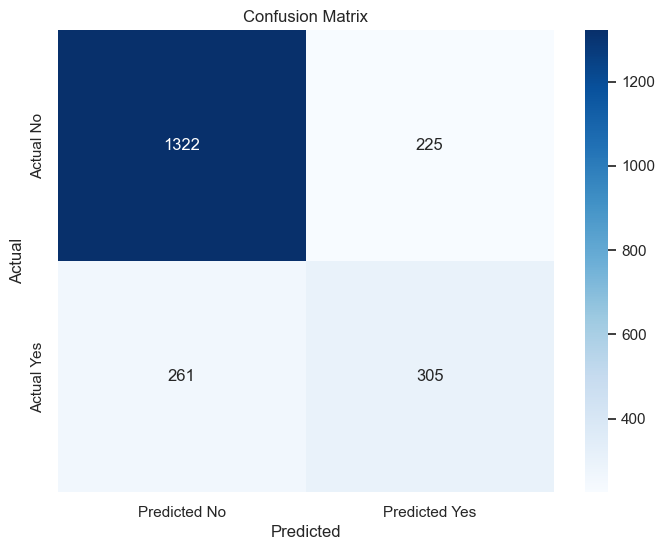

In [157]:

import seaborn as sns

confusion = metrics.confusion_matrix(y_test_final.Churn, y_test_final.predicted)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted No", "Predicted Yes"],
            yticklabels=["Actual No", "Actual Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [158]:
# the accuracy of the model 

print(metrics.accuracy_score(y_test_final.Churn, y_test_final.predicted))

0.7699952673923331


In [159]:
# true positives
tp1 = confusion_one[1,1] 

#true negatives
tn1 = confusion_one[0,0]

# false positives
fp1 = confusion_one[0,1]

# false negatives
fn1 = confusion_one[1,0]

In [160]:
# sensitivity of the model : A measure of how accurately does the model predict the positive outcomes
# sesitivity can also be termed as true positive rate 

tp1 /(tp1+fn1)

0.5388692579505301

In [161]:
# specificity of the model : A measure of how accurately does the model predict negative outcomes 

tn1 /(tn1+fp1)

0.8545572074983839

In [162]:
# false positive rate : A measure of how many 0s were predicted as 1 

fp1 /(tn1+fp1)

0.14544279250161604

1. Model works well 
2. The accuracy, sensitivity, specificity are very close to the one generated by the train set on a similar cutoff
3. We can select different cutoff to increase the accuracy, sensitivity and specificity based on the requirement of the case in context